In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Empirical Distributions of a Statistic

In [3]:
united = Table.read_table('united.csv')
united = united.with_column('Row', np.arange(united.num_rows)).move_to_start('Row')

In [4]:
def sample_median(size):
    return np.median(united.sample(size).column('Delay'))

In [5]:
# (Population) Parameter
np.median(united.column('Delay'))

2.0

In [6]:
# (Sample) Statistic
sample_median(10)

8.5

In [7]:
# (Sample) Statistic
sample_median(100)

2.5

In [8]:
sample_medians_10 = make_array()
sample_medians_100 = make_array()
sample_medians_1000 = make_array()

num_simulations = 2000

for i in np.arange(num_simulations):
    new_median_10 = sample_median(10)
    sample_medians_10 = np.append(sample_medians_10, new_median_10)
    new_median_100 = sample_median(100)
    sample_medians_100 = np.append(sample_medians_100, new_median_100)
    new_median_1000 = sample_median(1000)
    sample_medians_1000 = np.append(sample_medians_1000, new_median_1000)

In [9]:
sample_medians = Table().with_columns('Size 10', sample_medians_10, 
                                      'Size 100', sample_medians_100,
                                      'Size 1000', sample_medians_1000)

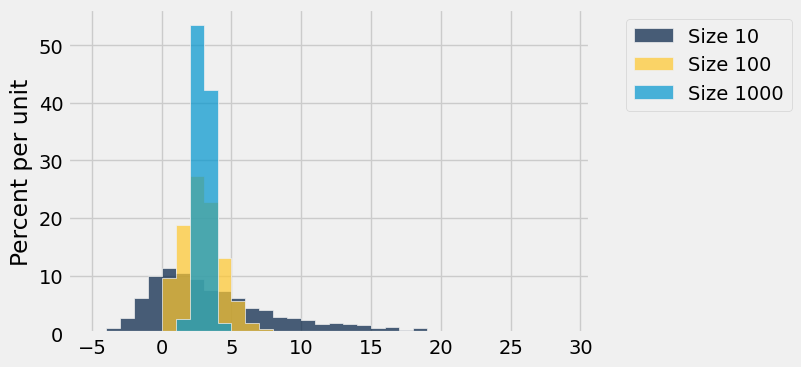

In [10]:
sample_medians.hist(bins = np.arange(-5, 30))

## Swain vs. Alabama ##

In [11]:
population_proportions = make_array(.26, .74)
population_proportions

array([ 0.26,  0.74])

In [12]:
sample_proportions(100, population_proportions)

array([ 0.26,  0.74])

In [13]:
def panel_number():
    return np.round(sample_proportions(100, population_proportions).item(0)*100)

In [14]:
panel_number()

30.0

In [15]:
panels = make_array()
repetitions = 100000


for i in np.arange(repetitions):
    new_panel = panel_number()
    panels = np.append(panels, new_panel)

print(panels)

[ 26.  33.  25. ...,  23.  23.  24.]


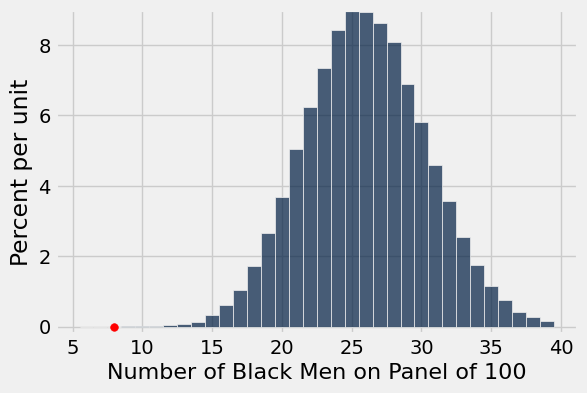

In [16]:
panels_table = Table().with_column(
    'Number of Black Men on Panel of 100', panels
)

panels_table.hist(bins=np.arange(5.5,40.))

# Plotting details; ignore this code
plots.ylim(-0.002, 0.09)
plots.scatter(8, 0, color='red', s=30);

## p-Value ##

### Method 1 ###

In [17]:
# (1) Calculate the p-value: simulation area beyond observed value
observed_statistic = 8
np.count_nonzero(panels <= observed_statistic) / repetitions
# (2) See if this is less than 5%

0.0

### Method 2 ###

In [18]:
# (1) Find simulated value corresponding to 5% of 50,000 = 2500
five_percent_of_entries = int(0.05 * panels_table.num_rows)
five_percent_point = panels_table.sort(0).column(0).item(five_percent_of_entries)
five_percent_point

19.0

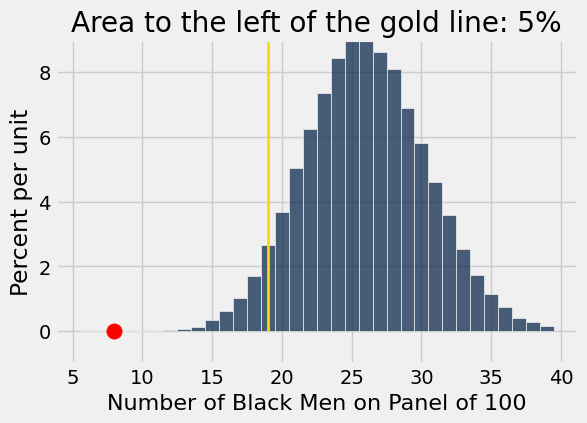

In [19]:
panels_table.hist(bins=np.arange(5.5,40.))
plots.ylim(-0.01, 0.09)
plots.plot([five_percent_point, five_percent_point], [0, 0.35], color='gold', lw=2)
plots.title('Area to the left of the gold line: 5%');
plots.scatter(observed_statistic, 0, color='red', s=120);

## Mendel and Pea Flowers ##

In [1]:
## Mendel had 929 plants, of which 709 had purple flowers
observed_purples = 709 / 929
observed_purples

0.7631862217438106

In [21]:
predicted_proportions = make_array(.75, .25)
sample_proportions(929, predicted_proportions)

array([ 0.71151776,  0.28848224])

In [22]:
def purple_flowers():
    predicted_proportions = make_array(.75, .25)
    return sample_proportions(929, predicted_proportions).item(0) * 100

In [23]:
purple_flowers()

74.70398277717976

In [25]:
purples = make_array()

for i in np.arange(100000):
    new_purple = purple_flowers()
    purples = np.append(purples, new_purple)

In [26]:
purples

array([ 74.48869752,  75.34983854,  75.13455328, ...,  73.95048439,
        73.62755651,  76.31862217])

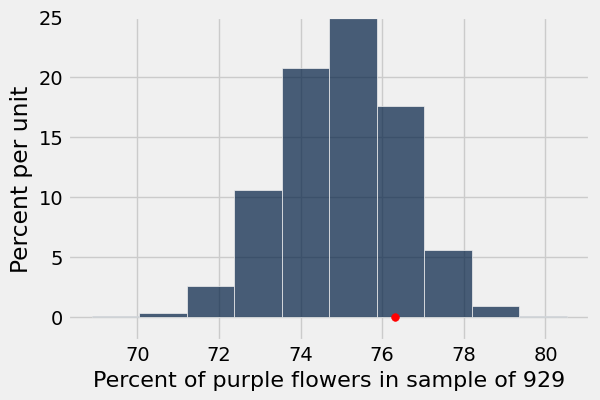

In [27]:
Table().with_column('Percent of purple flowers in sample of 929', purples).hist()

# Plotting details; ignore this code
plots.ylim(-0.02, 0.25)
plots.scatter(observed_purples * 100, 0, color='red', s=30);

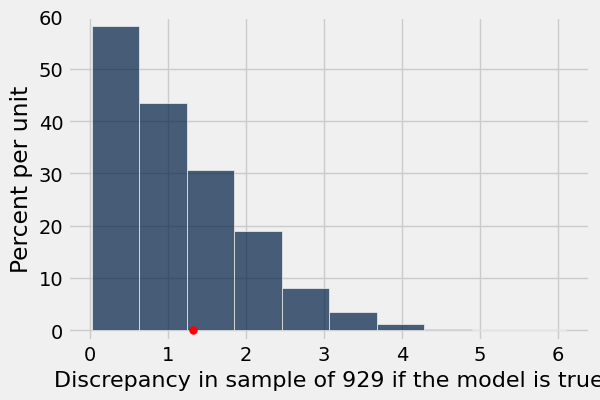

In [28]:
Table().with_column('Discrepancy in sample of 929 if the model is true', abs(purples- 75)).hist()

# Plotting details; ignore this code
plots.ylim(-0.02, 0.6)
plots.scatter(abs(observed_purples * 100 - 75), 0, color='red', s=30);

In [30]:
discrep = abs(observed_purples * 100 - 75)
discrep

1.318622174381062

In [31]:
# p-value of test
np.count_nonzero(abs(purples - 75) >= discrep) / len(purples)

0.36137